# Linear prediction: Least Squares Estimate + Maximum Likelihood

### Linear prediction : Least Squares Estimate

**Notebook putting the excellent Machine lectures of Nando de Freitas in code/(LA)tex(t). **
This is the first lesson dealing with LM, Least Squares Estimate and matrices

- linear models can be approximat a lot of real processes 
- Linear regression often appears as a module of larger systems.
- Linear problems can be solved analytically.
- Linear prediction provides an introduction to many of the core concepts of machine learning.

Lecture slides can be found at:
http://www.cs.ubc.ca/~nando/540-2013/lectures.html

https://davidhamann.de/2017/06/12/latex-cheat-sheet/
http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html

In [279]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import numpy as np

# path to png's
PATH = 'C:\\Users\\Schiphol\\Documents\\ubc_ml\\png\\linear_prediction\\'

In 2D a LM is essentially $\hat{y} = {\theta}_{1} + X_{i}.{\theta}_{2}$ where ${\theta}_{1}$ is the intercept and ${\theta}_{_2}$ is the slope.

J is the objective/cost function and the best parameters are found by minimizing J 

$J({\theta}) = \sum_{i=1}^n (Y_{i} - {\theta}_{1} - X_{i}.{\theta}_{2})^2$

In [2]:
# let' s plot some random values and fit a line
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 4 * x - 5 + rng.randn(50)

Model slope = 4.027208810360695 and intercept: -4.998577085553199


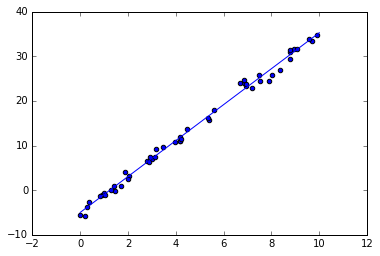

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(x[:, np.newaxis], y)   # x[:, np.newaxis].shape = (50, 1) instead of (50,)

xfit = np.linspace(0, 10, 1000)
yfit = lm.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
print ('Model slope = {} and intercept: {}'.format(lm.coef_[0], lm.intercept_))

We are trying to to minimize the quadratic distance between **y** and **$\hat{y}$** (minimizing the sum of errors). The $\xi$ between the fitted line and the traning points are like springs that stabilize at a minimum energy configuration. Fitting a model will always produce errors and dealing with ML is dealing with uncertainty and the quantification of it.

So writing $\hat{y} = 1 * {\theta}_{1} +..+ X_{i}.{\theta}_{2}$ can also be written down in a tight **matrix notation**: easier to code in Python and to manipulate with algorithms. First trick is to put the first input $x_{i} = 1$ so that the ${\theta}_{1}$ corresponds to the intercept of the line. ${\theta}_{1}$ then is known as the bias or offset. 

Matrix form of $\hat{y} = X {\theta} : $

$\begin{pmatrix}
\hat{y}_{1} & \vdots & \hat{y}_{n} \\
\end{pmatrix}$ = 
$\left[ \begin{array}{cccc}
1 & x_{12} & \ldots & x_{1D} \\
1 & x_{22} & \ldots & x_{2D} \\
1 & x_{32} & \ldots & x_{ND} \\ \end{array} \right]$
$\left[ \begin{array}{cccc}
{\theta}_{1} & \vdots & {\theta}_{d} \\
\end{array} \right]$

${\theta}$ matrix has 3 degrees of freedom: 1 intercept and 2 slopes in both directions. 

Now suppose ${\theta}$ = [1, 0, .5]T. Then, by multiplying X times ${\theta}$, we would get the following predictions on the training set

$\hat{y} = \left[ \begin{array}{cccc}
2 \\ 22 \\ 16.5 \\ 18.5 \\\end{array} \right]$ 
$ = \left[ \begin{array}{cccc}
1 & 100 & 2 \\ 1 & 50  & 42 \\ 1 & 45  & 31  \\ 1 & 60 & 35 
\end{array} \right]$
$ x \left[ \begin{array}{cccc}
1 \\ 0 \\ .5 \\ \end{array} \right]$ 

** Optimization approach ** 

Our aim is to minimiz the quadratic cost between the ouput labels and model predictions: $\sum_{i=1}^n (Y_{i} - \hat{Y}_{i})^2$. If we would plot the cost function $J({\theta}, {\theta}_{2})$, we have an equation of a quadratic and visualized it looks like a parabola. Let's plot one to illustrate the concept.

C:\Users\Schiphol\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Schiphol\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


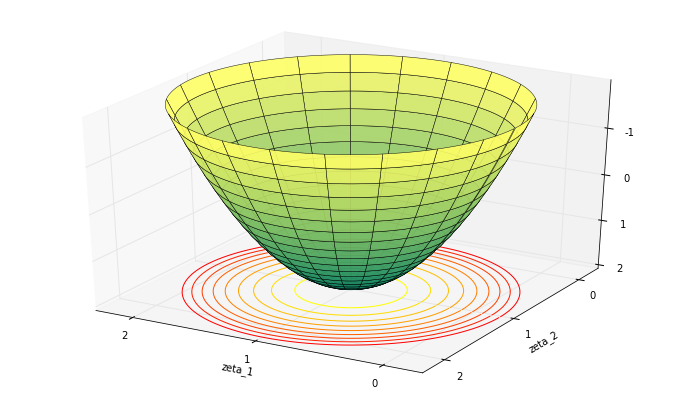

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from math import pi
fig = plt.figure(figsize= [12,7])
ax = fig.add_subplot(111, projection='3d')

r = T = np.arange(0, 2*pi, 0.03)
r, T = np.meshgrid(r, T)
#Parametrise it
X = r*np.cos(T) 
Y = r*np.sin(T)
Z = r**2

plt.locator_params(axis= 'x', nbins=5)
plt.locator_params(axis= 'y', nbins=5)
plt.locator_params(axis= 'z', nbins=5)

ax.plot_surface(X, Y, Z,  alpha=0.9, rstride=10, cstride=10, linewidth=0.5, cmap=cm.summer)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.set_xticklabels([2, 1, 0, -1, -2])
ax.set_yticklabels([2, 1, 0, -1, -2])
ax.set_zticklabels([2, 1, 0, -1, -2])
ax.set_xlabel('zeta_1')
ax.set_ylabel('zeta_2')
plt.show()
# to do add quivers / latex in xlabel throws error/ widen the parabola

The derivative of ${\theta}_{1}$ and of ${\theta}_{2}$ are 2D vectors. The fact from calculus that we need to remember is that the gradient is always perpendicular to the contour plots. **The gradient is the direction steepness/steepest change to the global minumum where $J({\theta})$ gets minimized ** and the LM is perfectly alligned with the points (and where the derivative is 0). 

ex: suppose N = 3, d= 2

$J({\theta}) = (Y_{1} - {\theta}_{1} - X_{1}{\theta}_{2})^2 + (Y_{2} - {\theta}_{1} - X_{2}{\theta}_{2})^2 + (Y_{3} - {\theta}_{1} - X_{3}{\theta}_{2})^2$

$J({\theta}) = \sum_{i=1}^3 (Y_{i} - {\theta}_{1} - X_{i}{\theta}_{2})^2$

If we take the derivative of ${\theta}_{1}$ we would get:  (Derivatives are linear so we take the derivative inside a sum.)

$J({\theta}) = \sum_{i=1}^3 2(Y_{1} - {\theta}_{1} - X_{i}{\theta}_{2}) (-1)$ 
(-1) is the derivative as respect from the term

$J({\theta}) = -2\sum_{i=1}^3 (Y_{1} - {\theta}_{1} - X_{i} {\theta}_{2})$

Once we have this derivative, we can equate it to 0 in order to find the minimum. But after that we have to find the mimimum of ${\theta}_{2}$ as well and if we did not use matrices, we would have to do this painful process for every parameter. 

Fortunately we have **matrices** that also come with some very nice properties. Here is a nice article on https://www.khanacademy.org/math/precalculus/precalc-matrices/properties-of-matrix-addition-and-scalar-multiplication/a/properties-of-matrix-scalar-multiplication

Here we take the derivative of a quadratic form $2A^T{\theta}$ and we can write the cost, compute the derivatives all in a single go with respect to all the vectors of ${\theta}$. 

So in particular the derivative of the cost is just the derivative with respect to the vector ${\theta}$

$\frac{\partial}{\partial\theta} = [Y^TY + {\theta}^TX^TX{\theta} - 2Y^TX{\theta}]$ 

where $Y^TY$ is the quadratic form of $(Y-X{\theta})^T(Y-X{\theta})$

= $0 + 2X^TX{\theta} - 2X^TY$, equating the derivatives to zero:

= $2X^TX{\theta} = 2X^TY$

so 

${\theta} = (X^TX)^{-1}X^TY$ which is the ** LEAST SQUARES ESTIMATE**

So if you massage your data into the matrix X and vector y, computing ${\theta}$ is jst doing a matrix conversion (multiplication of matrices), then having a new x-value x the ${\theta}$, gives you the prediction.

It illustrates an important concept: that you can think of learning as a concept of optimization, where the cost function is a function of the data, of some parameters thta can be adjusted until you arrive at the bottom of he cost function where the derivative is 0

In [84]:
from sklearn import datasets
data = datasets.load_boston()
X = data.data
y = data.target

## Use the LEAST SQUARES ESTIMATE equation to calculate OLS coefficient estimates:
b = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))

In [89]:
# to make predictions in this case, feed it the features
def predict(X):
        y_pred = X.dot(b[:,np.newaxis]) # from (13,) to (13,1)
        return y_pred

In [93]:
# first 5 
predict(X)[:5]

array([[ 29.10255504],
       [ 24.50656965],
       [ 31.2317794 ],
       [ 29.71046643],
       [ 29.56672407]])

### Probabilistic linear prediction &  maximum likelihood

Formulate the problem of linear prediction using probabilities/ introduce the maximum likelihood estimate and show it coincides with the least squares estimate. 

- Multivariate Gaussian distributions
- How to formulate the likelihood for linear regression
- Computing the maximum likelihood estimates for linear regression.
- Understand why maximum likelihood is used

slides: http://www.cs.ubc.ca/~nando/540-2013/lectures/l3.pdf

Starting with univariate Gaussian distribution. The **probability density function (PDF)** of a Gaussian distribution is given by:

$P(X) = \frac{1}{\sqrt{2\pi .\sigma^2}}$ where X is coming from a normal distribution $ X \sim \mathcal{N}(\mu,\,\sigma^{2}).$ 

where X is a candidate from the Gaussian distribution, $\mu$ is the mean and $\sigma^2$ is the variance. The $\sim$ symbol means 'sampled from, generated from'

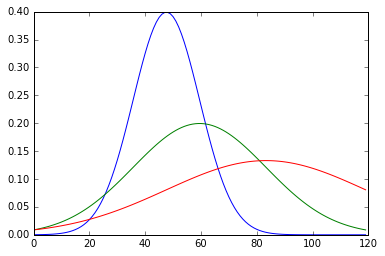

In [137]:
# plot 3 Gaussian distributions
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    plt.plot(gaussian(np.linspace(-5, 5, 120), mu, sig))

The area under the curve (AUC) adds up to P =1 = the probability distribution so the integral $\int_{-\infty}^{\infty} P(X) dx = 1$ (from -Inf to Inf)

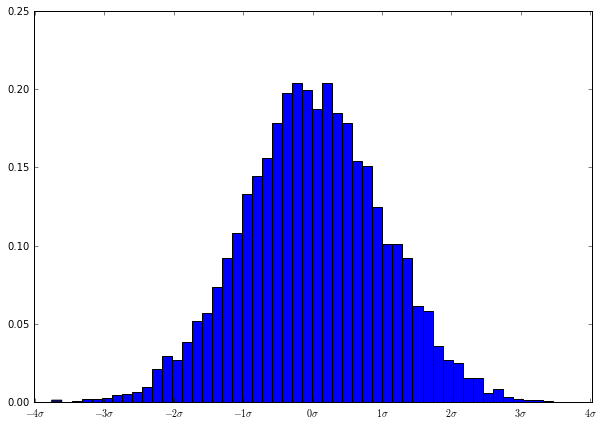

In [136]:
# to plot some random data from a normal distribution
from scipy.stats import norm
fig, ax = plt.subplots(figsize=[10,7])

x = np.random.normal(4, 2, 10000) # mu =4 and sigma=2
mean, sigma = np.mean(x), np.std(x)
x -= mean

ax.hist(x, bins=50, normed=True, label="data")
ax.set(xticks = np.arange(-4*sigma, 4.1 * sigma, sigma), 
       xticklabels=[r"${} \sigma$".format(i) for i in range(-4,5)]);

### sampling from a Guassian distribution

Call a random generator and grab samples. Related to this is a the **Central Limit theorem**: if you have random variables up until infinity, the distribution becomes Gaussian. For lots of machine learning algorithms picking random varibales from all sorts of distributions is often applied in order to simulate and learn.

If you histogram the sampels, you are basically doing a **Monte Carlo Simulation**: the more samples I have, the more the histogram will approximate the actual density of the actual distribution.

In [148]:
def pdf(x, mu=0, sigma=1):
    """
    Calculates the normal distribution's probability density 
    function (PDF).  

    """
    term1 = 1.0 / ( sqrt(2*np.pi) * sigma )
    term2 = np.exp( -0.5 * ( (x-mu)/sigma )**2 )
    return term1 * term2

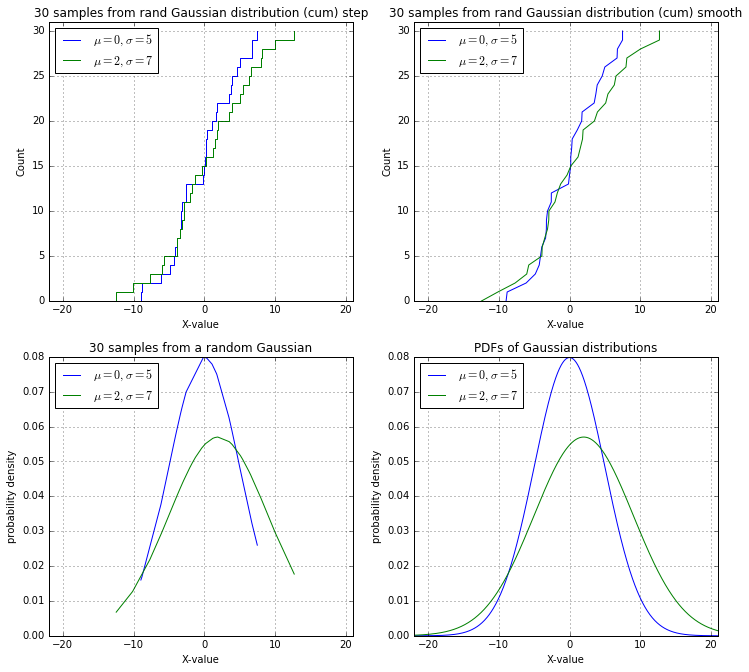

In [155]:
## Code from https://stackoverflow.com/questions/15408371/cumulative-distribution-plots-python.  
from math import ceil, floor, sqrt
# Random Gaussian data (mean=0, stdev=5)
# Random Gaussian data (mean=0, stdev=5)
data1 = np.random.normal(loc=0, scale=5.0, size=30)
data2 = np.random.normal(loc=2, scale=7.0, size=30)

data1.sort(), data2.sort()

min_val = floor(min(data1+data2))
max_val = ceil(max(data1+data2))

fig = plt.gcf()
fig.set_size_inches(12,11)

# Cumulative distributions, stepwise:
plt.subplot(2,2,1)
plt.step(np.concatenate([data1, data1[[-1]]]), np.arange(data1.size+1), label='$\mu=0, \sigma=5$')
plt.step(np.concatenate([data2, data2[[-1]]]), np.arange(data2.size+1), label='$\mu=2, \sigma=7$') 

plt.title('30 samples from rand Gaussian distribution (cum) step')
plt.ylabel('Count')
plt.xlabel('X-value')
plt.legend(loc='upper left')
plt.xlim([min_val, max_val])
plt.ylim([0, data1.size+1])
plt.grid()

# Cumulative distributions, smooth:
plt.subplot(2,2,2)

plt.plot(np.concatenate([data1, data1[[-1]]]), np.arange(data1.size+1), label='$\mu=0, \sigma=5$')
plt.plot(np.concatenate([data2, data2[[-1]]]), np.arange(data2.size+1), label='$\mu=2, \sigma=7$') 

plt.title('30 samples from rand Gaussian distribution (cum) smooth')
plt.ylabel('Count')
plt.xlabel('X-value')
plt.legend(loc='upper left')
plt.xlim([min_val, max_val])
plt.ylim([0, data1.size+1])
plt.grid()


# Probability densities of the sample points function
plt.subplot(2,2,3)

pdf1 = pdf(data1, mu=0, sigma=5)
pdf2 = pdf(data2, mu=2, sigma=7)
plt.plot(data1, pdf1, label='$\mu=0, \sigma=5$')
plt.plot(data2, pdf2, label='$\mu=2, \sigma=7$')

plt.title('30 samples from a random Gaussian')
plt.legend(loc='upper left')
plt.xlabel('X-value')
plt.ylabel('probability density')
plt.xlim([min_val, max_val])
plt.grid()


# Probability density function
plt.subplot(2,2,4)

x = np.arange(min_val, max_val, 0.05)

pdf1 = pdf(x, mu=0, sigma=5)
pdf2 = pdf(x, mu=2, sigma=7)
plt.plot(x, pdf1, label='$\mu=0, \sigma=5$')
plt.plot(x, pdf2, label='$\mu=2, \sigma=7$')

plt.title('PDFs of Gaussian distributions')
plt.legend(loc='upper left')
plt.xlabel('X-value')
plt.ylabel('probability density')
plt.xlim([min_val, max_val])
plt.grid()

Picture a uniform distribution on the y-axis and start drawing random samples. We project that number onto the cumulative distribution line and at the point of interception we read of the samples. They will spread around $\mu$ mostly

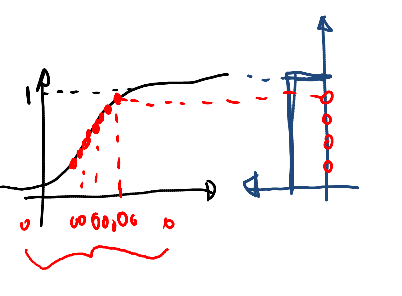

In [161]:
from IPython.display import Image
Image(filename = PATH + "01_random_sampling.png", width=500, height=200)

$\frac{1}$

### Multivariate Gaussian distribution

Multivariate Gaussian distribution is a generalization of the bell-shaped distribution in n-dimensions. 

$P(Y) = \lvert2\pi\sum \rvert ^{-\frac{1}{2}} \epsilon ^{-\frac{1}{2} (y - \mu)^T \sum^{-1} (y - \mu)}$

where P(Y) is the random variable. The means give you the center. Sigma describes the shape of the bell function. 

C:\Users\Schiphol\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Schiphol\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


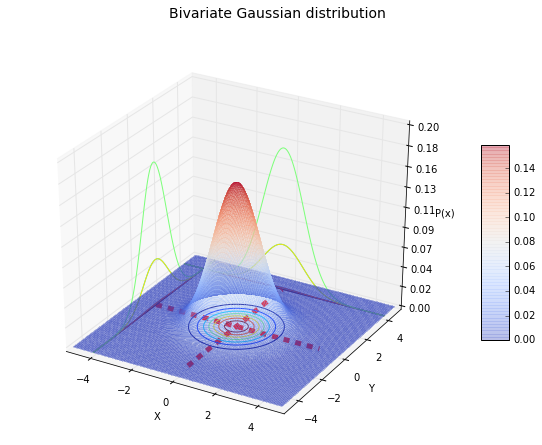

In [274]:
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y) # Bivariate Gaussian distribution for equal shape *X*, *Y*.

gdb = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False, alpha= .2)
cset = ax.contour(X, Y, Z, zdir='x', offset=-4)
cset = ax.contour(X, Y, Z, zdir='y', offset=4)
cset = ax.contour(X, Y, Z, zdir='z', offset=0)

xline1, yline1= np.linspace(0, 0, 1000), np.linspace(-4,4, 1000)
xline2, yline2= np.linspace(-4,4, 1000), np.linspace(0,0, 1000)
ax.plot(xline1, yline1, 'red', lw=5, linestyle ='--')
ax.plot(xline2, yline2, 'red', lw=5, linestyle ='--')

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
ax.set(xlabel = 'X', ylabel = 'Y', zlabel = 'P(x)', zlim = [0, 0.2])

labels = [i.get_text() for i in ax.xaxis.get_ticklabels(minor=False, which ='major')]
# labels are empty = ?

fig.suptitle('Bivariate Gaussian distribution', fontsize =14)
fig.colorbar(gdb, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm);

A contour-plotted sigma matrix of $ \sum = \left[ \begin{array}{cccc}
1 & 0 \\ 0 & 1 \end{array} \right]$ would look like a perfectly circular contour plot. If on the other hand we would have some correlation like in $ \sum = \left[ \begin{array}{cccc}
1 & .5 \\ .5 & 1 \end{array} \right]$ the contourplot would be ovally shaped to the right. So changing sigmas, changes all the shapes. 

When sampling we need to learn the parameters, the $\mu s$ and the $\sigma s$. Assume we have 2 independent univariate Gaussian variables. $X_{1} = \mathcal{N}(\mu, \sigma^{2})$ and $X_{2} = \mathcal{N}(\mu_{2}, \sigma^{2})$. The joint $P(X_{1}, X_{2})$ is the product of $X_{1}$ and $X_{2}$ = $P(X_{1}) P(X_{2})$. This is what **independent** means: you can break the probability as the product of the individual probabilities. 

Sampling from a **multivariate Gaussian** distribution. We know that we have a 1D Guassian $ X \sim \mathcal{N}(\mu,\,\sigma^{2}).$ and hence, particular in machines we know how to draw samples from a distribution with mean = 0 and variance = 1 

$ X \sim \mathcal{N}(0,1).$

In the multivariate case using the derivation we did before:

$P(X_{1}, X_{2}) = (2\pi\sigma^2)^{-1} \mathcal{E}^{-\frac{1}{2}} [(x_{1} - \mu_{1}) (x_{2} - \mu_{2})] 
\left[ \begin{array}{cccc} \sigma^{2} & \sigma \\ \sigma & \sigma^{2} \end{array} \right] 
\left[ \begin{array}{cccc} x_{1} - \mu_{1} \\ x_{2} - \mu_{2} \end{array} \right]
$

$\def\doubleunderline#1{\underline{\underline{#1}}}$
If we need to draw a random vector from a multivariate distribution we will first break the matrix Sigma into the product of 2 matrices: $\doubleunderline{Z} = \doubleunderline{\mathcal{B}}.\doubleunderline{\mathcal{B} ^T}$
(double bars mean it is a matrix))

This is called the **CHOLESKY DECOMPOSITION**. Cholesky decomposition is applied to the correlation matrix, providing a lower triangular matrix L, which when applied to a vector of uncorrelated samples, u, produces the covariance vector of the system. Cholesky decomposition assumes that the matrix being decomposed is **Hermitian and positive-definite**. Since we are only interested in real-valued matrices, we can replace the property of Hermitian with that of symmetric (i.e. the matrix equals its own transpose).

$\underline{X} \sim \underline{\mu} + \mathcal{B} \hspace{5mm} \mathcal{N}(0,1)$

drawing a vector by adding a vector to the matrix $\mathcal{B}$ times gaussian variables. 

Changes are mimimal you'd ever code a cholesky in pure python **(scipy has the scipy.linalg.cholesky method)** but it allows to understand its inner workings:

In [278]:
# site: quantstart.com
# function @ https://www.quantstart.com/articles/Cholesky-Decomposition-in-Python-and-NumPy
# -- Michael Halls-Moore on January 23rd, 2013 --

from math import sqrt
from pprint import pprint
 
def cholesky(A):
    """Performs a Cholesky decomposition of A, which must 
    be a symmetric and positive definite matrix. The function
    returns the lower variant triangular matrix, L."""
    n = len(A)

    # Create zero matrix for L
    L = [[0.0] * n for i in range(n)]

    # Perform the Cholesky decomposition
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k): # Diagonal elements
                # LaTeX: l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}
                L[i][k] = sqrt(A[i][i] - tmp_sum)
            else:
                # LaTeX: l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L
 
A = [[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]]
L = cholesky(A)

print ("A:")
pprint(A)

print ("L:")
pprint(L)

A:
[[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]]
L:
[[2.449489742783178, 0.0, 0.0, 0.0],
 [1.2247448713915892, 2.1213203435596424, 0.0, 0.0],
 [1.6329931618554523, 1.414213562373095, 2.309401076758503, 0.0],
 [3.2659863237109046,
  -1.4142135623730956,
  1.5877132402714704,
  3.1324910215354165]]


**Question**
Let's create a concrete example using probabilites. Assume we have 3 data points: $Y_{1} = 1, \hspace{3mm} Y_{2} = .5, \hspace{3mm} Y_{3} = 1.5$ which are independent with unknown $\mu$ and variance =1. What is the mean that best describes those 3 points?? Consider 2 guesses: 1 and 2.5. Which one has a higher likelihood ?

$Y_{i} \sim \hspace{2mm} \mathcal{N}(\theta, 1) = \theta + \mathcal{N}(0,1)$ 

with likelihood $P(y_{1}y_{2}y_{3} \rvert \theta) = P(y_{1} \rvert \theta) \hspace{2mm} P(y_{2} \rvert \theta) \hspace{2mm} P(y_{3} \rvert \theta)$

Finding the $\mu$ that maximizes the likelihood is equivalent to moaving a Gaussian until the product of the green bars is maximized.

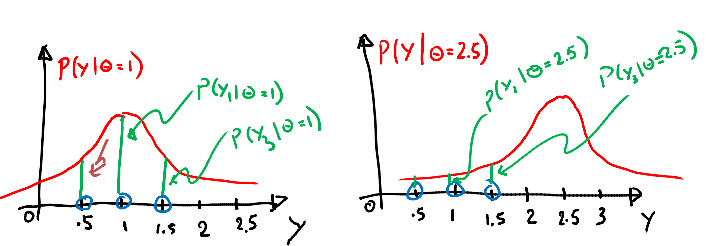

In [283]:
Image(filename = PATH + "01_maximum_likelihood.png", width=800, height=400)

Going back to linear models we translate the concept of Gaussian distributions by saying that the regression is the $\mu$ and the points vary along the line. 

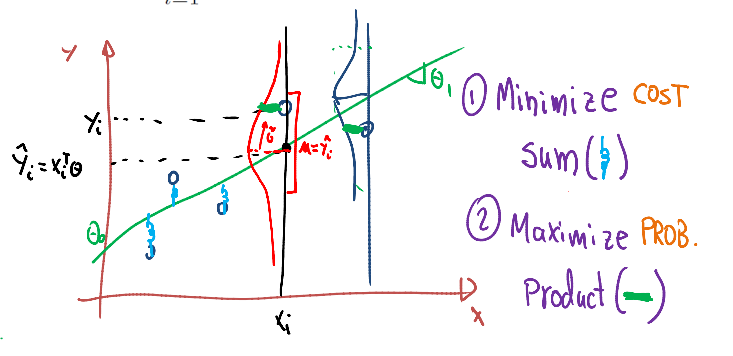

In [284]:
Image(filename = PATH + "01_maximum_likelihood_lr.png", width=800, height=400)

To say that each point is Gaussian distributed, is stating there is a distribution whose $\mu$ is **centered** at $Y_{i}$ and that has a variance $\sigma^2$. The distribution is at the y-direction. Linear regression is about maximizing the height of the green bars. The **Maximum Likelihood Estimate (MLE)** for a Gaussian and Linear Regression is to maximize the probability, or, equivalently, the log of that probability (it's lots easier to work in log-space because we get rid of the exponents)

$\mathcal{L}(0) = -{\frac{n}{2}} \hspace{3mm} log(2\pi \sigma^{2}) - -{\frac{1}{2\sigma^{2}}}
(Y - X\theta)^T (Y-X\theta)$ Here we basically look for the peak of the Gaussian: where the slope is 0. The goals is to maximize the liklihood of seeing the training data y by modifying the parameters $(\theta, \sigma)$

The derivative of the log-likelihood with respect to the vector $\theta$ is:

$\frac{\partial \mathcal{L} (\theta)}{\partial \theta} = 0 - -{\frac{1}{2 \sigma^2}} [0 - 2X^TY + 2X^T X \theta]$ equating to 0.

$\hat\theta_{ml} = (X^TX)^{-1} X^TY$

If you know the $\mu$ and the $\sigma^2$ of a Gaussian, in order to make a prediction, take the $\theta_{ml}$ and the $\hat\theta_{ml}$ from the training set and once we have those, you plug them in and that gives you your prediction. If you have a new point, say $X_{\star}$ you essentially take the mean which is $X_{\star}\theta$. You also know how uncertain you are because you have your $\sigma$


http://dan.iel.fm/emcee/current/user/line/#maximum-likelihood-estimation
https://github.com/dfm/emcee/blob/master/examples/line.py

Maximum likelihood is part of frequentist learning, assumingthat there exists a true model with a true parameter $\theta_{0}$ or $\hat\theta$. In ML we essentially find this $\hat\theta$ by maximizing a joint probability. 

$\hat\theta = argmax \hspace{2mm} P(X_{1:n} \rvert \theta)$

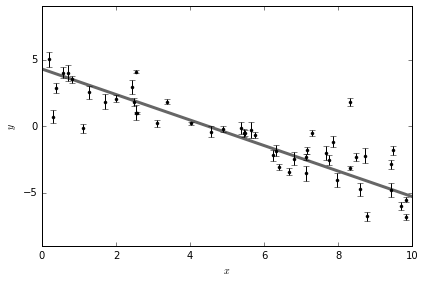

In [287]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

# Plot the dataset and the true model.
xl = np.array([0, 10])
plt.errorbar(x, y, yerr=yerr, fmt=".k")
plt.plot(xl, m_true*xl+b_true, "k", lw=3, alpha=0.6)
plt.ylim(-9, 9)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()

Least-squares results:
    m = -0.9288670988859091 ± 0.013402073150676987 (truth: -0.9594)
    b = 4.425204359058084 ± 0.07818145995401413 (truth: 4.294)



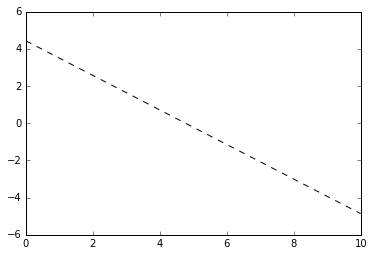

In [288]:
# Do the least-squares fit and compute the uncertainties.
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))
print("""Least-squares results:
    m = {0} ± {1} (truth: {2})
    b = {3} ± {4} (truth: {5})
""".format(m_ls, np.sqrt(cov[1, 1]), m_true, b_ls, np.sqrt(cov[0, 0]), b_true))

# Plot the least-squares result.
plt.plot(xl, m_ls*xl+b_ls, "--k")

Maximum likelihood result:
    m = -0.8351904981358901 (truth: -0.9594)
    b = 3.8431574764356755 (truth: 4.294)
    f = 0.5685464916083657 (truth: 0.534)



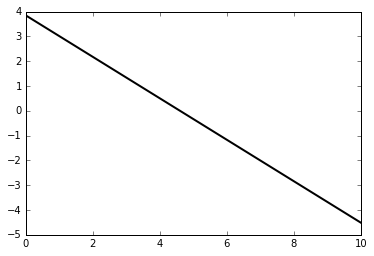

In [291]:
import scipy.optimize as op
# Define the probability function as likelihood * prior.
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

# Find the maximum likelihood value.
chi2 = lambda *args: -2 * lnlike(*args)
result = op.minimize(chi2, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]
print("""Maximum likelihood result:
    m = {0} (truth: {1})
    b = {2} (truth: {3})
    f = {4} (truth: {5})
""".format(m_ml, m_true, b_ml, b_true, np.exp(lnf_ml), f_true))

# Plot the maximum likelihood result.
plt.plot(xl, m_ml*xl+b_ml, "k", lw=2)

In order to understand ML, it's usefull to look at a much simpler model called **Bernoulli**, describing an event that is either False or True. 

In [304]:
# in code
from scipy.stats import bernoulli 

p_true=1/2 # this is the value we will try to estimate from the observed data
fp=bernoulli(p_true)

def sample(n=10):
    'simulate coin flipping'
    return fp.rvs(n)# flip it n times

xs = sample(100) # generate some samples

In [305]:
xs

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1])

In [306]:
# Now, we can write out the likelihood function using sympy
import sympy
from sympy.abc import x, z
p=sympy.symbols('p',positive=True)

L=p**x*(1-p)**(1-x)
J=np.prod([L.subs(x,i) for i in xs]) # objective function to maximize

C:\Users\Schiphol\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in log
  """


ValueError: x and y must have same first dimension

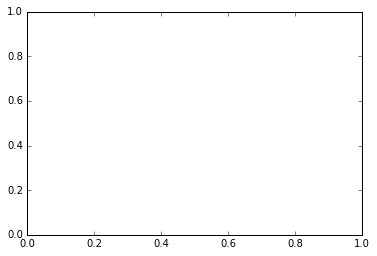

In [309]:
logJ=sympy.expand_log(sympy.log(J))
sol=sympy.solve(sympy.diff(logJ,p),p)[0]

x=np.linspace(0,1,100)
plt.plot(x,map(sympy.lambdify(p,logJ,'numpy'),x),sol,logJ.subs(p,sol),'o',
                                          p_true,logJ.subs(p,p_true),'s',)
xlabel('$p$',fontsize=18)
ylabel('Likelihood',fontsize=18)
title('Estimate not equal to true value',fontsize=18)